# 美味的亚洲和印度菜肴

## 简介
亚洲和印度菜肴以其丰富的风味和多样的食材而闻名。无论是辛辣的咖喱还是清淡的蒸点心，这些菜肴都能满足各种口味。

## 常见食材
以下是一些在亚洲和印度菜肴中常见的食材：
- 大米：许多菜肴的主食。
- 香料：如姜黄、孜然、香菜和辣椒。
- 豆类：如扁豆和鹰嘴豆。
- 蔬菜：如茄子、菠菜和花椰菜。
- 酱料：如酱油、鱼露和椰奶。

## 经典菜肴
### 亚洲菜肴
- **寿司**：一种日本料理，由醋饭和生鱼片组成。
- **炒面**：一种中式料理，通常搭配蔬菜和肉类。
- **越南春卷**：用米纸包裹新鲜蔬菜和肉类的健康选择。

### 印度菜肴
- **黄油鸡**：一种奶油味浓郁的咖喱鸡。
- **印度薄饼（Naan）**：一种用烤炉烤制的软面饼。
- **豆子咖喱（Dal）**：用扁豆制作的传统菜肴。

## 烹饪技巧
- 使用新鲜的食材以确保最佳风味。
- 适量使用香料，避免过度。
- 慢炖咖喱以释放香料的全部风味。

## 健康益处
亚洲和印度菜肴通常富含蔬菜和豆类，提供丰富的纤维和营养。此外，许多菜肴使用健康的烹饪方法，如蒸和炖。

## 总结
无论是亚洲还是印度菜肴，它们都以独特的风味和多样性吸引着全球的美食爱好者。尝试这些菜肴不仅是一种味觉享受，也是一种文化体验。


安装 Imblearn，它将启用 SMOTE。这是一个 Scikit-learn 包，可帮助在执行分类时处理不平衡数据。(https://imbalanced-learn.org/stable/)


In [1]:
pip install imblearn

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

该数据集包括385列，表示给定菜系中各种菜系的所有种类的成分。


In [4]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [6]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

在条形图中显示菜系


<AxesSubplot:>

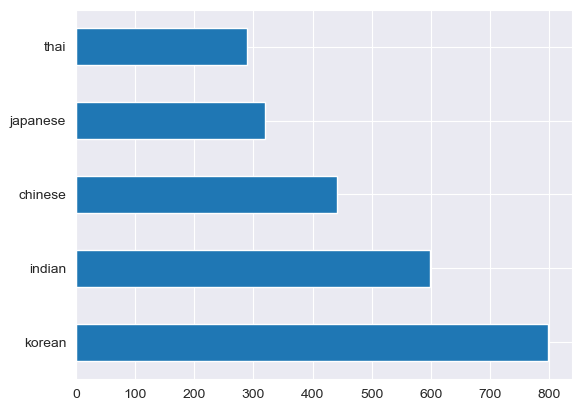

In [7]:
df.cuisine.value_counts().plot.barh()

In [8]:

thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [9]:
def create_ingredient_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df


<AxesSubplot:>

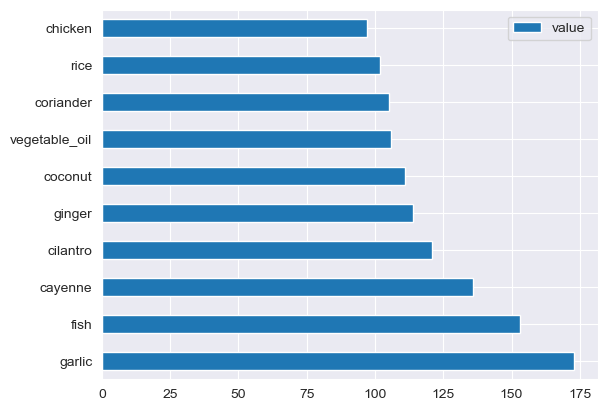

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

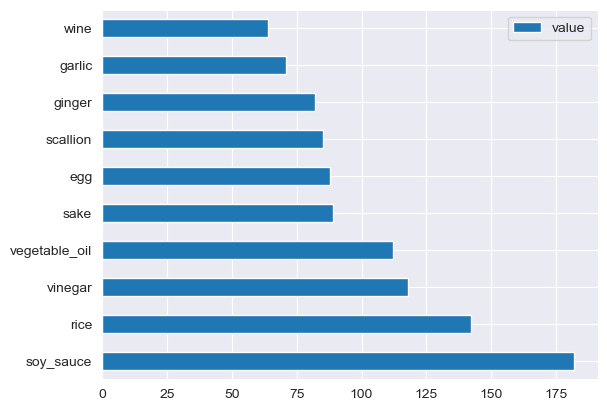

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

Error in callback <function flush_figures at 0x000002CBD58B4700> (for post_execute):



KeyboardInterrupt



<AxesSubplot:>

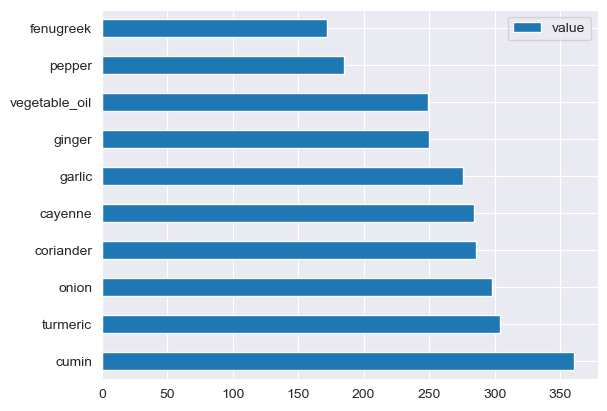

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<AxesSubplot:>

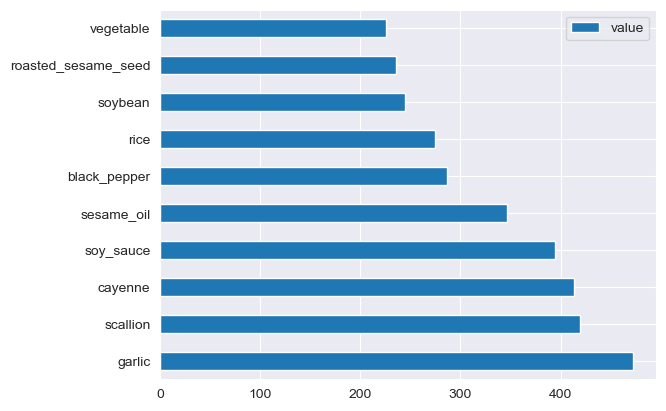

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


使用SMOTE过采样平衡数据到最高类别。阅读更多内容：https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html


In [16]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

D:\work\language\miniconda\envs\pytorch_39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(

KeyboardInterrupt



In [ ]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

In [ ]:
transformed_feature_df.head()

In [ ]:
# export transformed data to new df for classification
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

In [ ]:
transformed_df.info()

保存文件以供将来使用


In [ ]:
transformed_df.to_csv("../../data/cleaned_cuisines.csv")


---

**免责声明**：  
本文档使用AI翻译服务 [Co-op Translator](https://github.com/Azure/co-op-translator) 进行翻译。尽管我们努力确保翻译的准确性，但请注意，自动翻译可能包含错误或不准确之处。原始语言的文档应被视为权威来源。对于关键信息，建议使用专业人工翻译。我们不对因使用此翻译而产生的任何误解或误读承担责任。
